### The Problem Statement

Build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

### Import Libraries

In [1]:
# import necessary libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import The Dataset

In [2]:
df= pd.read_csv("F:\Extensive Analysis\weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
df = df[df.iloc[:,-1].notnull()]

### Exploratory Data Analysis

In [4]:
# Dimension of the data
print(f"Dimension of the data: {df.shape}")

Dimension of the data: (142193, 23)


In [5]:
# preview the dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
# view column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# view summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Commment
- We can see that the dataset contains the mixture of numerical and categorical and variables.
- Categorical variables have data type object.
- Numerical variables have data type float64.
- Also, there are some missing values in the dataset. We will explore it later.

### View statistical properties of the dataset

In [8]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

### Univariate Analysis

#### Explore RainTomorrow target variable

In [9]:
# check missing values
df['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the RainTomorrow target variable.

In [10]:
# view the frequency distribution unique values.
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [11]:
# View percentange of frequency distribution of values
(df['RainTomorrow'].value_counts()/len(df))*100

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

### comment 
- We can see that out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

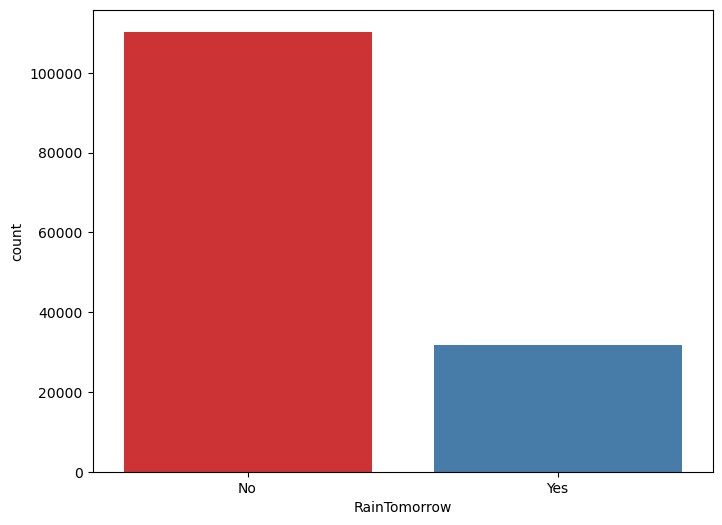

In [12]:
f,ax= plt.subplots(figsize =(8,6))
ax = sns.countplot(x = 'RainTomorrow', data = df, palette = "Set1" )
plt.show()

### Bivariate Analysis

#### Types of variables

 I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

### Explore Categorical Variable

In [13]:
# find categorical variable
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Number of categorical variables
print("The total number of categorical variables : ", len(categorical))

# print categorical variables*
print("\nThe categorical variables are : ")
print("\n",categorical)

The total number of categorical variables :  7

The categorical variables are : 

 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
# View the categorical variable
df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

### Summary of categorical variables
- There is a date available. It is denoted by Date column.
- There are six categorical variables.
- There are two binary categorical variables - RainToday and RainTomorrow.
- Rain Tomorrow is the target variable.

### Explore probelms within categorical variables
First,I will explore the categorical variable.
### Missing values in categorical variable.

In [15]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [16]:
#print categorical variable containing missing values
cat1 = [var for var in categorical if df[var].isnull().sum() != 0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


We can see that there are four categorical variables which contains missing values. These are 'WindGustDir', 'WindDir9am', 'WindDir3pm', and  'RainToday'.

In [17]:
### Frequency count of categorical variable

for var in categorical:
    print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [18]:
### View frequency distribution of categorical variable.
for var in categorical:
    print((df[var].value_counts()/df.shape[0])*100)
    

2013-12-01    0.034460
2014-01-09    0.034460
2014-01-11    0.034460
2014-01-12    0.034460
2014-01-13    0.034460
                ...   
2007-11-29    0.000703
2007-11-28    0.000703
2007-11-27    0.000703
2007-11-26    0.000703
2008-01-31    0.000703
Name: Date, Length: 3436, dtype: float64
Canberra            2.403775
Sydney              2.346810
Perth               2.245540
Darwin              2.244836
Hobart              2.242023
Brisbane            2.223035
Adelaide            2.173103
Bendigo             2.133720
Townsville          2.133016
AliceSprings        2.131610
MountGambier        2.130907
Launceston          2.129500
Ballarat            2.129500
Albany              2.121061
Albury              2.117544
PerthAirport        2.116138
MelbourneAirport    2.116138
Mildura             2.114731
SydneyAirport       2.113325
Nuriootpa           2.111215
Sale                2.109808
Watsonia            2.109105
Tuggeranong         2.108402
Portland            2.106995
Woomera   

### Number of labels : Cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a category is known as High Cardinality. High Cardinality may pose some serious problems in machine learning model. So, let's check for high cardinality.


In [19]:
### Check for cardinality in categorical variable
for var in categorical :
    print(var, "contains", df[var].nunique() ,"unique values")

Date contains 3436 unique values
Location contains 49 unique values
WindGustDir contains 16 unique values
WindDir9am contains 16 unique values
WindDir3pm contains 16 unique values
RainToday contains 2 unique values
RainTomorrow contains 2 unique values


We can see that there is a date variable which needs to be processed. I will do preprocessing in the following section.

### Feature engineering of Date variable

In [20]:
df['Date'].dtype

dtype('O')

We can see that the datatype of the variable Date is of type object. Let's convert it into Datetime.

In [21]:
# Convert the datatype of the variable Date
df['Date'] =pd.to_datetime(df['Date'])

In [22]:
# extract year from date
df['Year'] = df['Date'].dt.year

#extract month from date
df['Month'] = df['Date'].dt.month

# extract day from date
df['Day'] = df['Date'].dt.day

In [23]:
# Drop Date variable
df = df.drop(columns ='Date',axis =1)

### Explore categorical variable one by one

In [24]:
# Find categorical variables 
categorical = [var for var in df.columns if df[var].dtype == 'O']

print(f"There are {len(categorical)} categorical variables are available in the dataset.")

print(f"\nThe categorical variables are : \n\n {categorical}")

There are 6 categorical variables are available in the dataset.

The categorical variables are : 

 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
# Check for missing values in the categorcial variable.
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday variables contain missing values. I will explore these variables one by one.

### Explore Location variable

In [26]:
# print number of labels in location variable
print("Location contains ",len(df['Location'].unique()), "labels")

Location contains  49 labels


In [27]:
# Check labels in location variable
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [28]:
# Check frequency distribution of values in location variable
df['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [29]:
# Let's do One Hot Encoding of Location variable
# get k-1 variables after one hot encoding
pd.get_dummies(df['Location'], drop_first= True).head()

Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0       0       1             0              0         0        0         0   
1       0       1             0              0         0        0         0   
2       0       1             0              0         0        0         0   
3       0       1             0              0         0        0         0   
4       0       1             0              0         0        0         0   

   Cairns  Canberra  Cobar  ...  Townsville  Tuggeranong  Uluru  WaggaWagga  \
0       0         0      0  ...           0            0      0           0   
1       0         0      0  ...           0            0      0           0   
2       0         0      0  ...           0            0      0           0   
3       0         0      0  ...           0            0      0           0   
4       0         0      0  ...           0            0      0           0   

   Walpole  Watsonia  Williamtown  Witchcliffe  Wollongong  Woomera  
0        0         0            0            0           0        0  
1        0         0            0            0           0        0  
2        0         0            0            0           0        0  
3        0         0            0            0           0        0  
4        0         0            0            0           0        0  

[5 rows x 48 columns]

### Explore WindGustDir variable

In [30]:
# print numnber of labels in WindGustDir variable
print("WindGustDir contains", len(df['WindGustDir'].unique()), "labels")

WindGustDir contains 17 labels


In [31]:
# Check frequency distribution of WindGustDir
df['WindGustDir'].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [32]:
#  let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method


pd.get_dummies(df['WindGustDir'],drop_first= True,dummy_na=True)

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0         0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1         0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
2         0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3         0    0  0   1    0    0   0  0   0    0    0   0  0    0    0    0
4         0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
...     ...  ... ..  ..  ...  ...  .. ..  ..  ...  ...  .. ..  ...  ...  ...
145454    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
145455    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
145456    0    0  0   0    0    1   0  0   0    0    0   0  0    0    0    0
145457    0    0  1   0    0    0   0  0   0    0    0   0  0    0    0    0
145458    0    0  0   0    0    0   0  0   1    0    0   0  0    0    0    0

[142193 rows x 16 columns]

In [33]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us howmany observations we have for each category.
pd.get_dummies(df['WindGustDir'], drop_first= True, dummy_na= True).sum(axis = 0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

In [34]:
# print number of labels in WindDir9am variable
print("WindDir9am contains ",len(df['WindDir9am'].unique()),"labels")

WindDir9am contains  17 labels


In [35]:
# Check labels in WindDir9am variable
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [36]:
# Check frequency distribution of values in WindDir9am variable.
df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [37]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1    0    0  0   0    0    1   0  0   0    0    0   0  0    0    0    0
2    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
3    0    0  0   0    0    0   0  0   1    0    0   0  0    0    0    0
4    1    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0

In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

We can see that there are 10013 missing values in the WindDir9am variable.

### Explore WindDir3pm variable

In [39]:
# print nunber of labels in WindDir3pm variable
print("WindDir3pm contains", len(df['WindDir3pm'].unique()), "labels")

WindDir3pm contains 17 labels


In [40]:
# Check labels in WindDir3pm variable
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [41]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [42]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
4    0    0  0   0    0    0   1  0   0    0    0   0  0    0    0    0

In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

There are 3778 missing values in the WindDir3pm variable.

### Explore RainToday variable

In [44]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [45]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [47]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

Yes  NaN
0    0    0
1    0    0
2    0    0
3    0    0
4    0    0

In [48]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

There are 1406 missing values in the RainToday variable.

### Explore Numerical Variable

In [49]:
# find numerical variables 

numerical = [var for var in df.columns if df[var].dtype != 'O']

print(f"There are {len(numerical)} numerical variables are available in the given dataset.")

print(f"\nThe numerical variables are : \n\n{numerical}")


There are 19 numerical variables are available in the given dataset.

The numerical variables are : 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [50]:
# view the numerical variables 
df[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

### Summary of Numerical variables

- There are 16 numerical variables.
- These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm,    Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
- All of the numerical variables are of continuous type.

### Explore problems with numerical variables

#### Missing values in numerical variables

In [51]:
# check missing values in numerical variables
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

There are 16 numerical variables which contain missing values.

### Outliers in numerical variables


In [52]:
# View summary statistic in numeric variables
print(round(df[numerical].describe(),2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.00  141871.00  140787.00     81350.00  74377.00      132923.00   
mean       12.19      23.23       2.35         5.47      7.62          39.98   
std         6.40       7.12       8.47         4.19      3.78          13.59   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.84        51.48      1017.65   
std            8.89          8.80        19.05     

On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

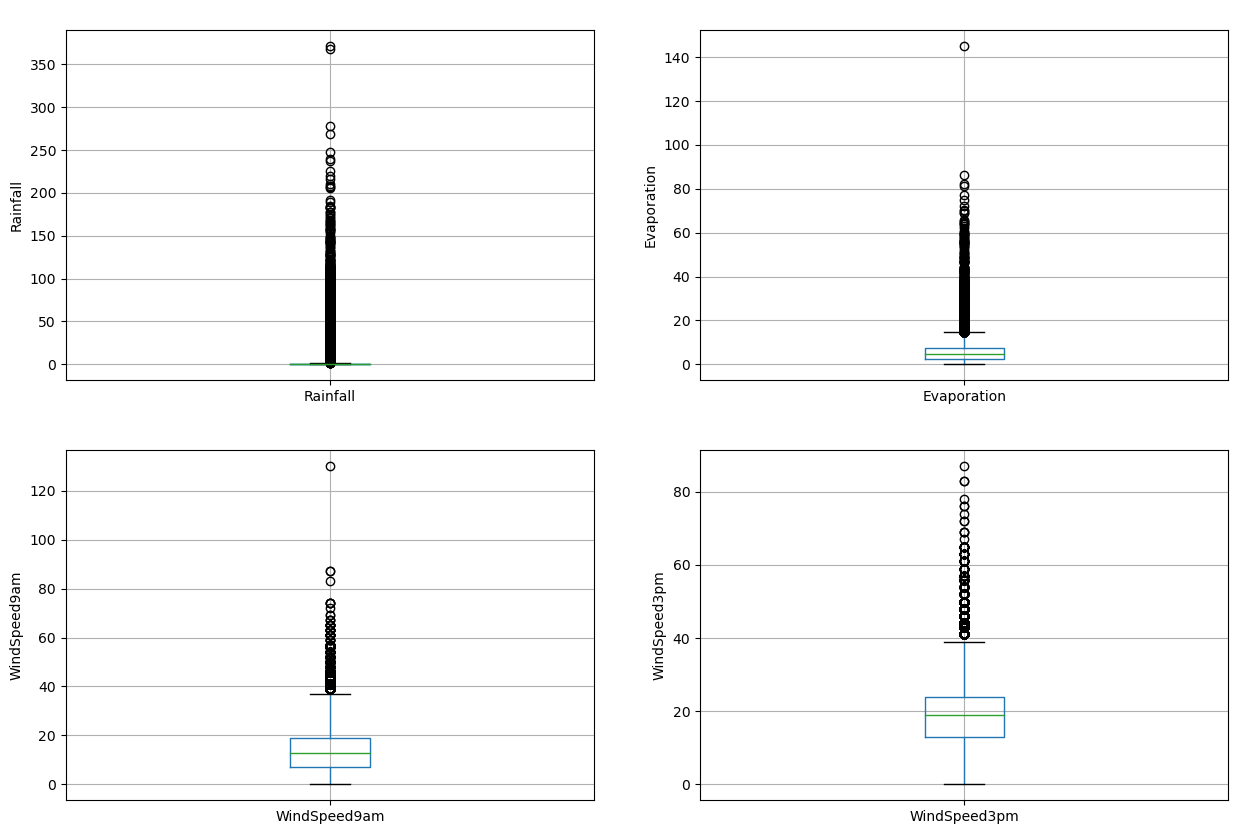

In [53]:
# Draw boxplots to visualize the outliers

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column ='Rainfall')
fig.set_title(" ")
fig.set_ylabel("Rainfall")

plt.subplot(2,2,2)
fig = df.boxplot(column ='Evaporation')
fig.set_title(" ")
fig.set_ylabel("Evaporation")

plt.subplot(2,2,3)
fig = df.boxplot(column ='WindSpeed9am')
fig.set_title(" ")
fig.set_ylabel("WindSpeed9am")

plt.subplot(2,2,4)
fig = df.boxplot(column ='WindSpeed3pm')
fig.set_title(" ")
fig.set_ylabel("WindSpeed3pm")


The above boxplots confirm that there are lot of outliers in these variables.

### Check distribution of variables
- Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

- If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

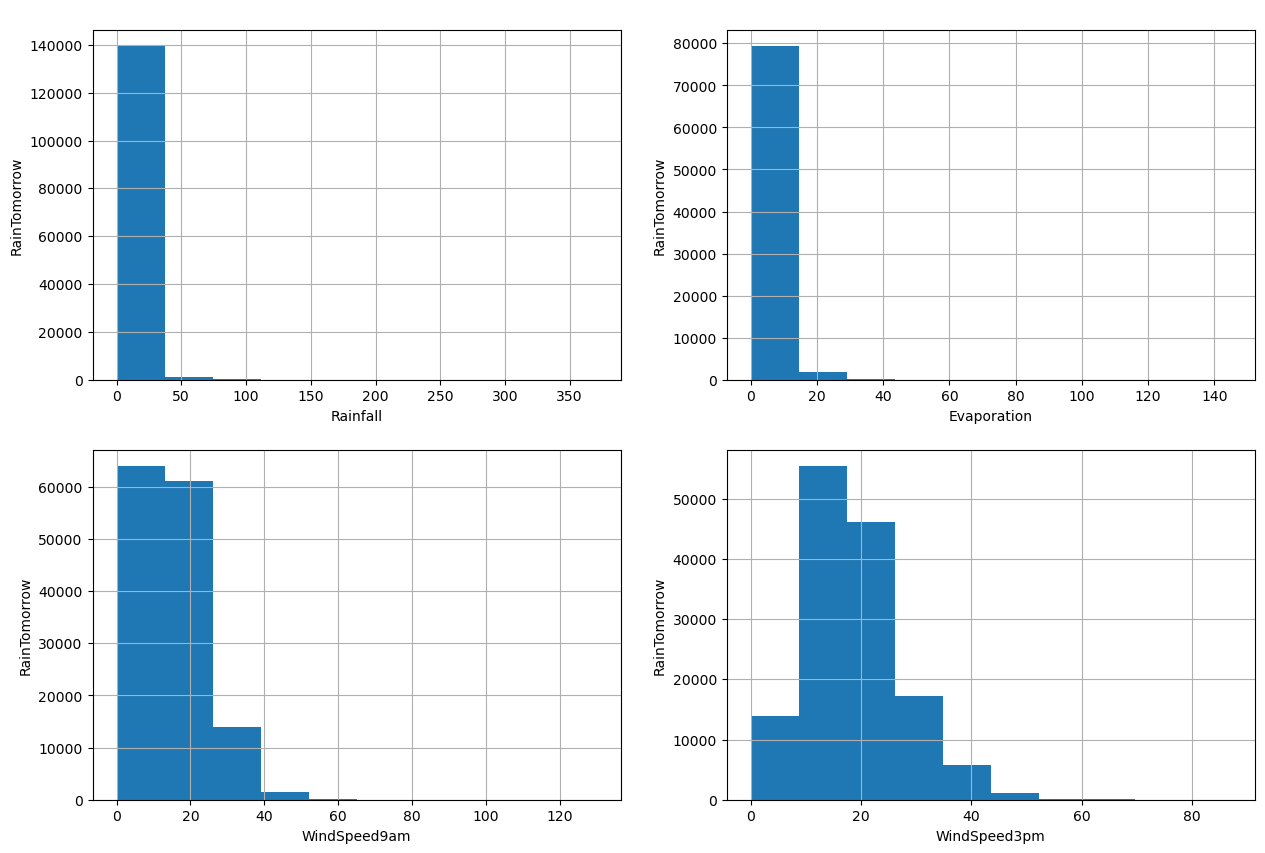

In [54]:
# Draw histograms to visualize the distribution

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = df['Rainfall'].hist(bins = 10)
fig.set_title(" ")
fig.set_xlabel("Rainfall")
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,2)
fig = df['Evaporation'].hist(bins = 10)
fig.set_title(" ")
fig.set_xlabel("Evaporation")
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,3)
fig = df['WindSpeed9am'].hist(bins = 10)
fig.set_title(" ")
fig.set_xlabel("WindSpeed9am")
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,4)
fig = df['WindSpeed3pm'].hist(bins = 10)
fig.set_title(" ")
fig.set_xlabel("WindSpeed3pm")
fig.set_ylabel("RainTomorrow")


We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [55]:
# Find outliers on RainFall variable
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)
lower_fence = df['Rainfall'].quantile(0.25) - (IQR * 3)
upper_fence = df['Rainfall'].quantile(0.75) + (IQR * 3)
print(f"RainFall outliers are values < {lower_fence}  and > {upper_fence}")
print(f"\nFor RainFall minimum and maximum values are {df['Rainfall'].min()} and {df['Rainfall'].max()}.So, the outliers are greater than 3.2")

RainFall outliers are values < -2.4000000000000004  and > 3.2

For RainFall minimum and maximum values are 0.0 and 371.0.So, the outliers are greater than 3.2


In [56]:
# Find outliers for Evaporation variable
IQR = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)
lower_fence = df['Evaporation'].quantile(0.25) - (IQR * 3)
upper_fence = df['Evaporation'].quantile(0.75) + (IQR * 3)
print(f"Evaporation outliers are values < {lower_fence}  and > {upper_fence}")
print(f"\nFor Evaporation minimum and maximum values are {df['Evaporation'].min()} and {df['Evaporation'].max()}.So, the outliers are greater than {upper_fence}")


Evaporation outliers are values < -11.800000000000002  and > 21.800000000000004

For Evaporation minimum and maximum values are 0.0 and 145.0.So, the outliers are greater than 21.800000000000004


In [57]:
# Find outliers for WindSpeed9am variable
IQR = df['WindSpeed9am'].quantile(0.75) - df['WindSpeed9am'].quantile(0.25)
lower_fence = df['WindSpeed9am'].quantile(0.25) - (IQR * 3)
upper_fence = df['WindSpeed9am'].quantile(0.75) + (IQR * 3)
print(f"WindSpeed9am outliers are values < {lower_fence}  and > {upper_fence}")
print(f"\nFor WindSpeed9am minimum and maximum values are {df['WindSpeed9am'].min()} and {df['WindSpeed9am'].max()}.So, the outliers are greater than {upper_fence}")


WindSpeed9am outliers are values < -29.0  and > 55.0

For WindSpeed9am minimum and maximum values are 0.0 and 130.0.So, the outliers are greater than 55.0


In [58]:
# Find outliers for WindSpeed3pm variable
IQR = df['WindSpeed3pm'].quantile(0.75) - df['WindSpeed3pm'].quantile(0.25)
lower_fence = df['WindSpeed3pm'].quantile(0.25) - (IQR * 3)
upper_fence = df['WindSpeed3pm'].quantile(0.75) + (IQR * 3)
print(f"WindSpeed3pm outliers are values < {lower_fence}  and > {upper_fence}")
print(f"\nFor WindSpeed3pm minimum and maximum values are {df['WindSpeed3pm'].min()} and {df['WindSpeed3pm'].max()}.So, the outliers are greater than {upper_fence}")


WindSpeed3pm outliers are values < -20.0  and > 57.0

For WindSpeed3pm minimum and maximum values are 0.0 and 87.0.So, the outliers are greater than 57.0


### Multivariate Analysis

- An important step in EDA is to discover patterns and relationships between variables in the dataset
- I will use heatmap and pairplot to discover patterns and relationships in the dataset
- First of all,I will draw a heat map

In [59]:
correlation = df.corr()

### Heat Map

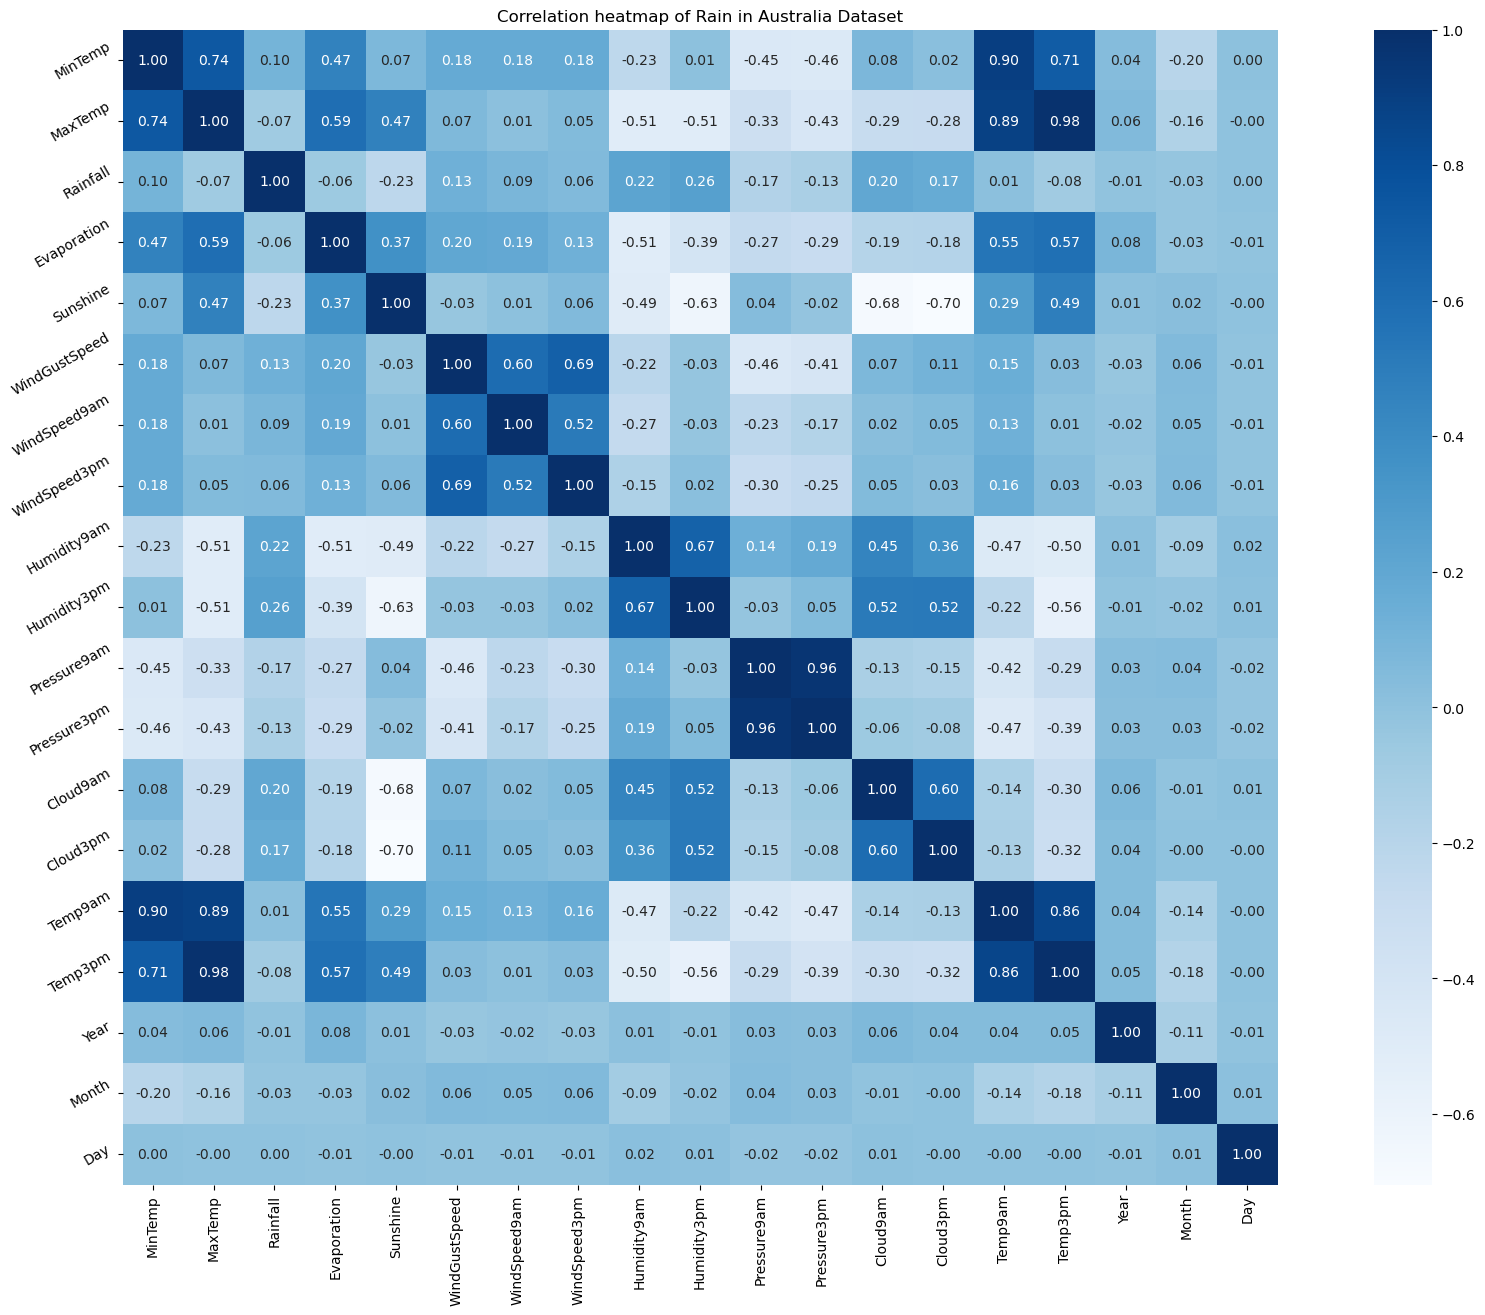

In [60]:
plt.figure(figsize= (25,15))
plt.title("Correlation heatmap of Rain in Australia Dataset")
ax = sns.heatmap(correlation, square=True, cmap= 'Blues',annot = True,  fmt =".2f",linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)
plt.show()

#### Interpretation

From the above correlation heatmap we can conclude that:
- MinTemp and MaxTemp variables are highly positively correlated(0.74).
- MinTemp and Temp9am variables are strongly positively correlated(0.90).
- MinTemp and Temp3pm variables are highly positively correlated(0.71).
- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).
- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).
- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).
- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).
- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).




### Pairplot

- First of all, I will extract the variables which are highly positively correlated.


In [61]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

Now, I will draw a pairplot to depict the relationship between these variables.


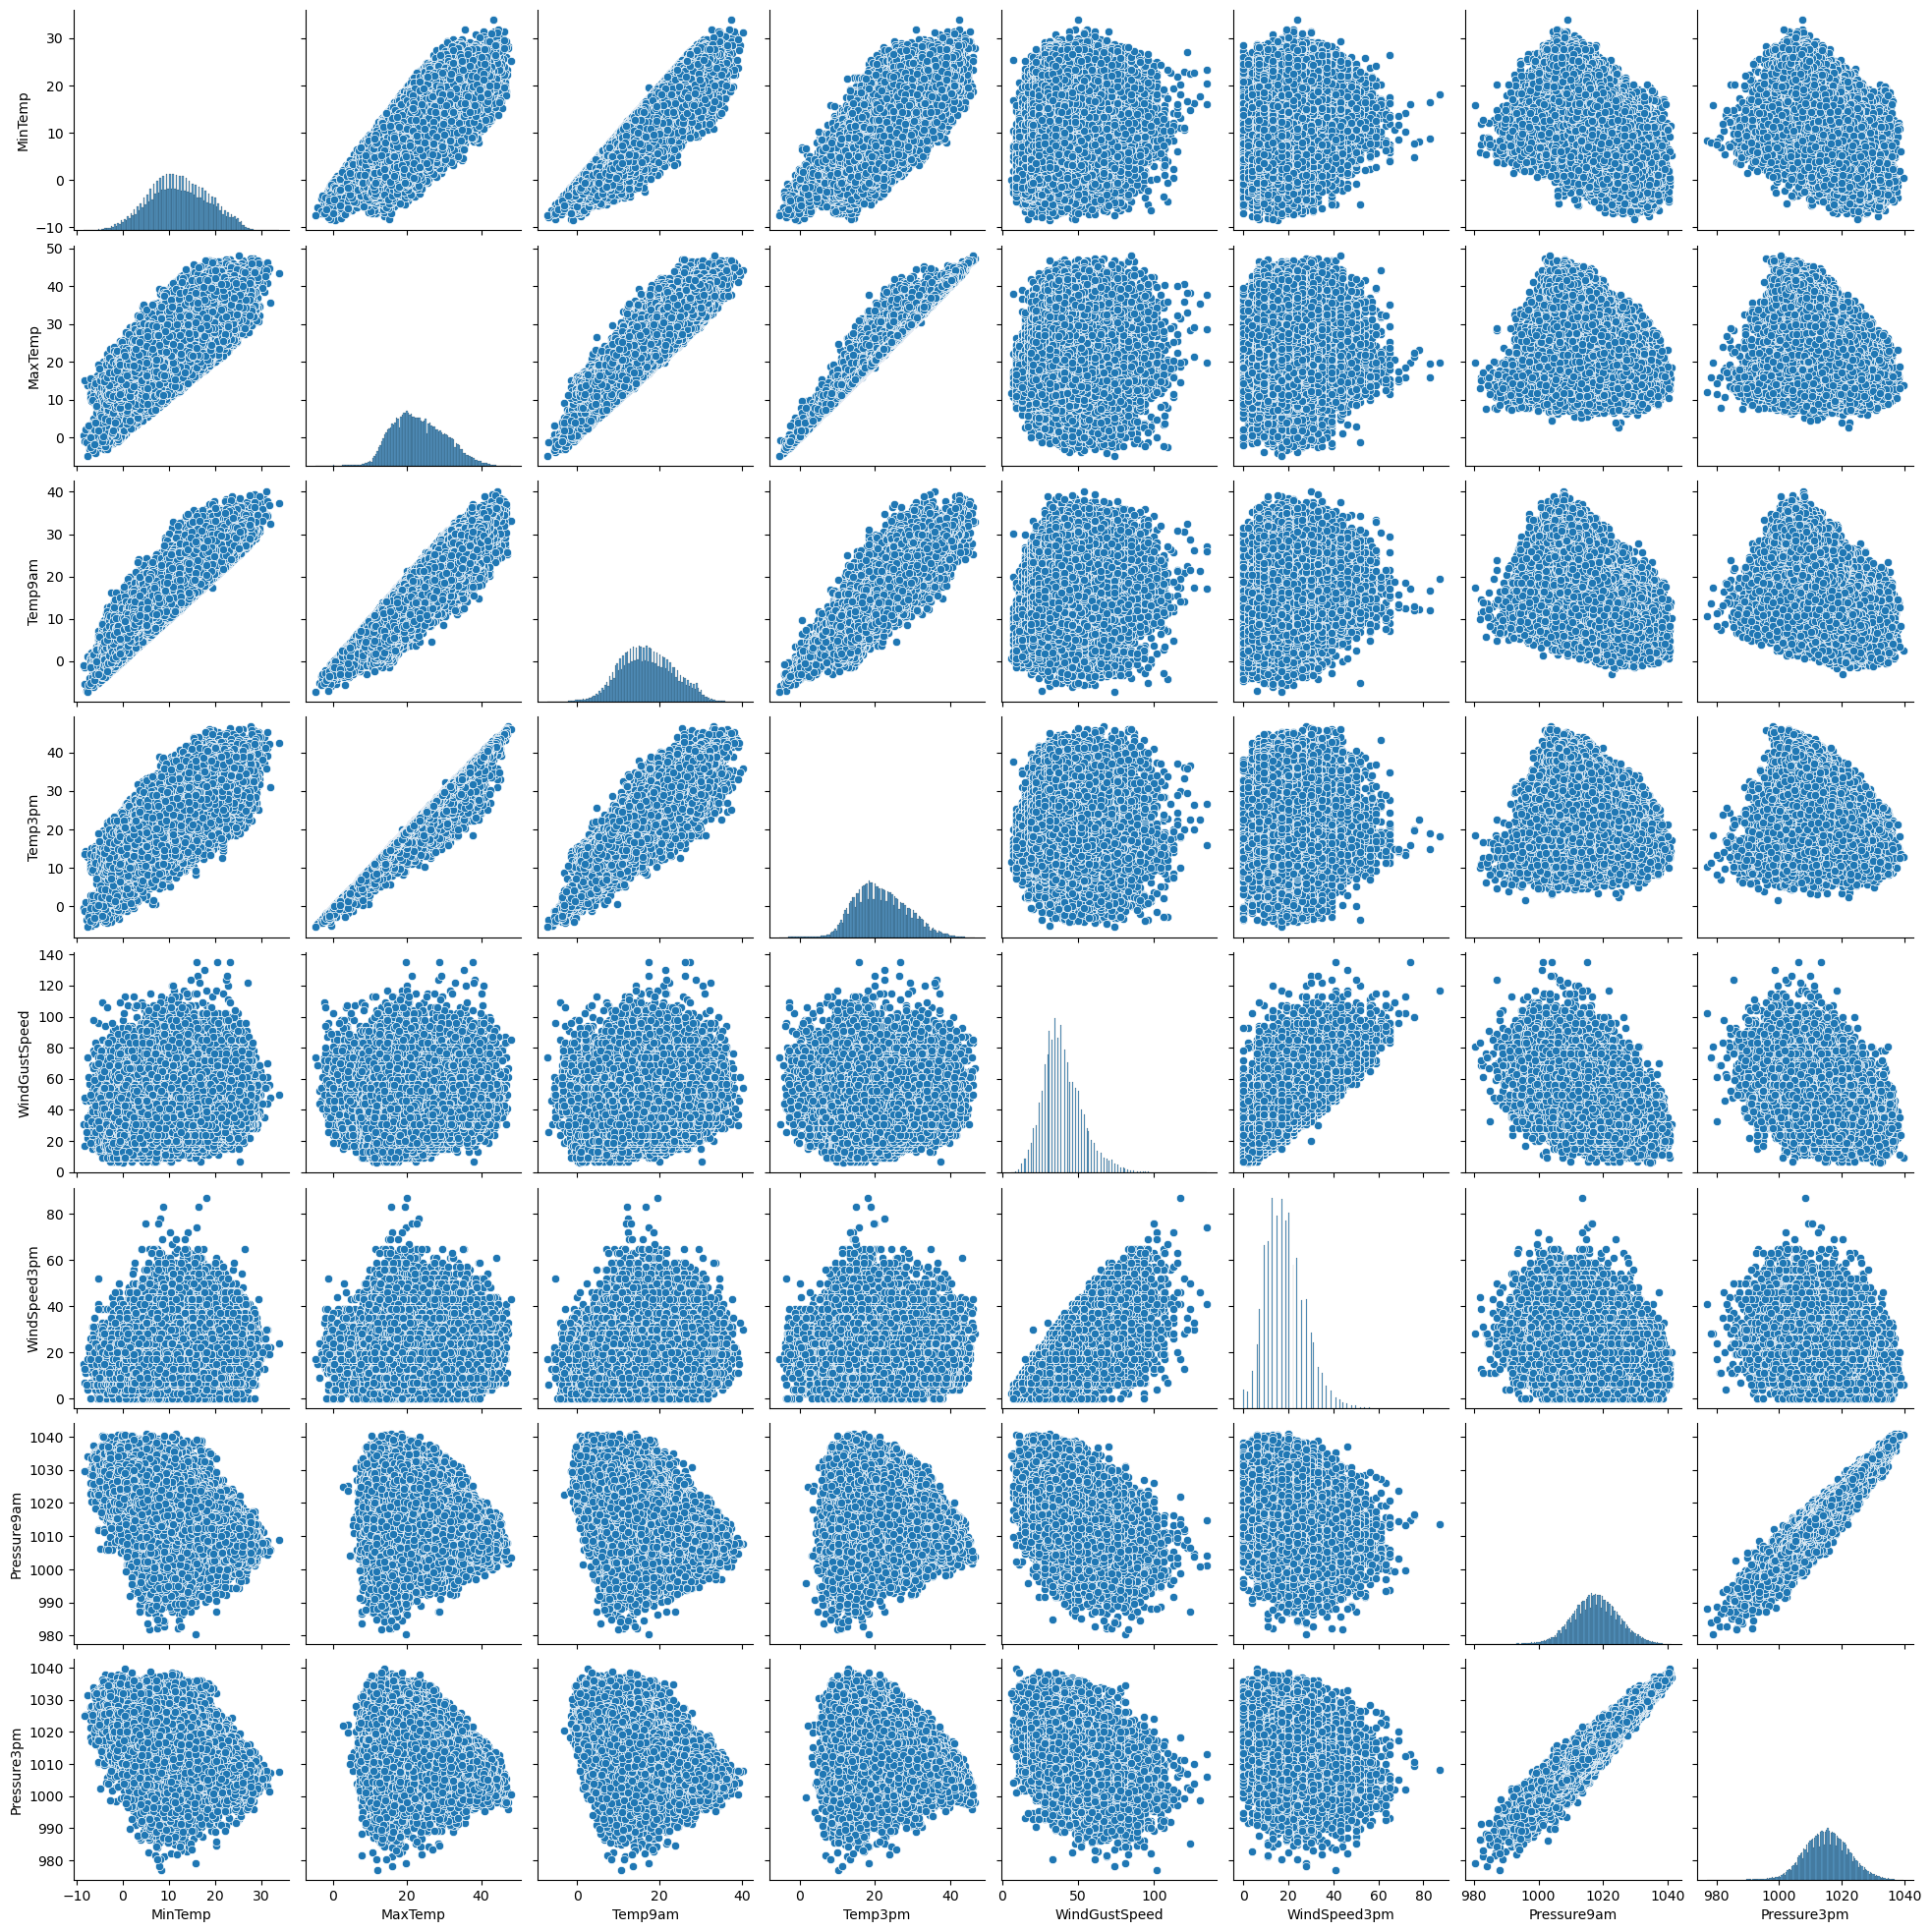

In [62]:
sns.pairplot(df[num_var], kind ='scatter', diag_kind= 'hist', palette ='Rainbow')
plt.show()

### Declare feature vector and Target variable


In [63]:
X = df.drop(['RainTomorrow'],axis = 1)# Feature vector
y = df['RainTomorrow'] # Target variable

In [64]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

### Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [66]:
# Check datatypes in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [67]:
# Display categorical variables
categorical = [col for col in X_train.columns if df[col].dtypes == 'O']
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [68]:
# Display  numerical variables
numerical = [col for col in X_train.columns if df[col].dtypes !=  'O']
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


### Engineering missing values in numerical variables


In [69]:
# check missing values in numerical variables
X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [70]:
# Check percentage of missing values in numerical variables
for col in numerical:
    if X_train[col].isnull().mean() >0 :
        print(col, round(X_train[col].isnull().mean(), 4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


#### Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values.
One is mean or median imputation and the other one Random Sample Imputation. When there are outliers in the dataset,we should use median imputation.
So,I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done 
over the training dataset, and then propogated to the test set. It means that the statistical measures to be used to fill missing values both in training and testing set, should be extracted from train set only. This is to avoid overfitting.

In [71]:
# Impute missing values in train and test set with repective column median in X_train
for col in X_train[numerical].columns :
    if X_train[col].isnull().sum() > 0 :
        X_train[col].fillna(X_train[col].median(),inplace =True)
        X_test[col].fillna(X_train[col].median(),inplace = True)

In [72]:
print(X_train[numerical].isnull().sum().sum(), X_test[numerical].isnull().sum().sum())

0 0


### Engineering missing values in categorical variables


In [73]:
# print percentage of missing values in categorical variables
X_train[categorical].isnull().mean() *100

Location       0.000000
WindGustDir    6.511419
WindDir9am     7.013380
WindDir3pm     2.644303
RainToday      1.001283
dtype: float64

In [74]:
# Impute categorical variables with most frequent value in a column
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [75]:
# check missing values in categorical variables
print(X_train[categorical].isnull().sum().sum(),X_test[categorical].isnull().sum().sum())

0 0


We can see that there is no missing values in train and test sets of the data.

### Engineering Outliers in numerical variables

We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [76]:
def max_value(df3, variable, top):
    return np.where(df3[variable] > top, top , df3[variable] )

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [77]:
print(" ", X_train['Rainfall'].max(), X_test['Rainfall'].max(),
     "\n",X_train['Evaporation'].max(), X_test['Evaporation'].max(),
     "\n", X_train['WindSpeed9am'].max(), X_test['WindSpeed9am'].max(),
     "\n", X_train['WindSpeed3pm'].max(), X_test['WindSpeed3pm'].max())

  3.2 3.2 
 21.8 21.8 
 55.0 55.0 
 57.0 57.0


In [78]:
X_train[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.867486      51.509547    1017.640649    1015.241101   
std        18.935587      20.530723       6.738680       6.675168   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        4.651801       4.703588      16.995062      21.688643   
std         2.292726       2.117847       6.463772       6.855649   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.300000   
max         9.000000       8.000000      40.200000      46.700000   

                Year          Month            Day  
count  113754.000000  113754.000000  113754.000000  
mean     2012.759727       6.404021      15.710419  
std         2.540419       3.427798       8.796821  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

### Encode Categorical Variable

In [79]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [80]:
X_train[categorical].head()

Location WindGustDir WindDir9am WindDir3pm RainToday
113462   Witchcliffe           S        SSE          S        No
89638         Cairns         ENE        SSE         SE       Yes
138130  AliceSprings           E         NE          N        No
87898         Cairns         ESE        SSE          E        No
16484      Newcastle           W          N         SE        No

In [81]:
# # RainToday binary conversion
# # Train Set
# for i in range(len(X_train['RainToday'])) :
#     if X_train['RainToday'].iloc[i] == 'Yes' :
#         X_train['RainToday'].iloc[i] = 1
#     else:
#         X_train['RainToday'].iloc[i] = 0
        
# # Test Set
# for i in range(len(X_test['RainToday'])) :
#     if X_test['RainToday'].iloc[i] == 'Yes' :
#         X_test['RainToday'].iloc[i] = 1
#     else:
#         X_test['RainToday'].iloc[i] = 0

# #Convering the datatype 
# X_train['RainToday'] = X_train['RainToday'].astype(int)

In [82]:
# Encode RainToday variable
### X_train
X_train = pd.concat([X_train[numerical],
    pd.get_dummies(X_train['RainToday'], prefix= 'RainToday'),
    pd.get_dummies(X_train['Location']),
    pd.get_dummies(X_train['WindGustDir']),
    pd.get_dummies(X_train['WindDir9am']),
    pd.get_dummies(X_train['WindDir3pm'])], axis = 1)

### X_test
X_test =pd.concat([X_test[numerical],
    pd.get_dummies(X_test['RainToday'], prefix= 'RainToday'),
    pd.get_dummies(X_test['Location']),
    pd.get_dummies(X_test['WindGustDir']),
    pd.get_dummies(X_test['WindDir9am']),
    pd.get_dummies(X_test['WindDir3pm'])], axis = 1)


In [83]:
X_test.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
88578      17.4     29.0       0.0          3.6      11.1           33.0   
59016       6.8     14.4       0.8          0.8       8.5           46.0   
127049     10.1     15.4       3.2          4.8       8.5           31.0   
120886     14.4     33.4       0.0          8.0      11.6           41.0   
136649      6.8     14.3       3.2          0.2       7.3           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  NNW  NW  S  \
88578           11.0          19.0         63.0         61.0  ...    0   0  0   
59016           17.0          22.0         80.0         55.0  ...    0   0  1   
127049          13.0           9.0         70.0         61.0  ...    0   0  0   
120886           9.0          17.0         40.0         23.0  ...    0   0  0   
136649          15.0          13.0         92.0         47.0  ...    0   0  0   

        SE  SSE  SSW  SW  W  WNW  WSW  
88578    0    0    0   0  0    0    0  
59016    0    0    0   0  0    0    0  
127049   0    1    0   0  0    0    0  
120886   0    0    0   1  0    0    0  
136649   0    0    0   0  0    0    0  

[5 rows x 118 columns]

We now have training and testing sets ready for model building. Before that,we should map all the features on the same scale.
It is called feature scaling. I will do it as follows.

### Feature Scaling

In [84]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm  ...            NNW             NW  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean       68.867486      51.509547  ...       0.054530       0.060288   
std        18.935587      20.530723  ...       0.227061       0.238021   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%        57.000000      37.000000  ...       0.000000       0.000000   
50%        70.000000      52.000000  ...       0.000000       0.000000   
75%        83.000000      65.000000  ...       0.000000       0.000000   
max       100.000000     100.000000  ...       1.000000       1.000000   

                   S             SE            SSE            SSW  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.067259       0.101605       0.064059       0.056402   
std         0.250471       0.302130       0.244860       0.230698   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  SW              W            WNW            WSW  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.064464       0.069334       0.060798       0.065483  
std         0.245578       0.254022       0.238960       0.247378  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 118 columns]

In [85]:
cols = X_train.columns

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train = pd.DataFrame(X_train,columns= [cols])
X_test = pd.DataFrame(X_test,columns= [cols])


In [88]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.484406       0.530004       0.210962       0.236312   
std         0.151741       0.134105       0.369949       0.129528   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.375297       0.431002       0.000000       0.183486   
50%         0.479810       0.517958       0.000000       0.220183   
75%         0.593824       0.623819       0.187500       0.247706   
max         1.000000       1.000000       1.000000       1.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.554562       0.262667       0.254148       0.326575   
std         0.190999       0.101682       0.160119       0.152384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.565517       0.193798       0.127273       0.228070   
50%         0.586207       0.255814       0.236364       0.333333   
75%         0.600000       0.310078       0.345455       0.421053   
max         1.000000       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm  ...            NNW             NW  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean        0.688675       0.515095  ...       0.054530       0.060288   
std         0.189356       0.205307  ...       0.227061       0.238021   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.570000       0.370000  ...       0.000000       0.000000   
50%         0.700000       0.520000  ...       0.000000       0.000000   
75%         0.830000       0.650000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

                   S             SE            SSE            SSW  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.067259       0.101605       0.064059       0.056402   
std         0.250471       0.302130       0.244860       0.230698   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  SW              W            WNW            WSW  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.064464       0.069334       0.060798       0.065483  
std         0.245578       0.254022       0.238960       0.247378  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 118 columns]

We now have X_train dataset ready to be fed into the LogisticRegression classifier.

### Model Training

In [89]:
# Train a logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state= 0)

#Fit the model 
logreg.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [90]:
# logreg.get_params()

### Predict Results

In [91]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

#### predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1) in this case,in array form.

0 is probabiity of No_Rain and 1 is for probability of rain.

In [92]:
#probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:,0]

array([0.91387267, 0.83562986, 0.82035823, ..., 0.97674032, 0.79853026,
       0.30734024])

In [93]:
# probability of getting output as 1logreg.predict_proba(X_test)[:, 1]

In [94]:
### Check Accuracy Score
from sklearn.metrics import accuracy_score

print(f"Model accuracy score: {accuracy_score(y_test,y_pred_test)}")

Model accuracy score: 0.8501353774745948


### Compare the train and test accuracy
Now, I will compare the train and test accuracy to check overfitting

In [95]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [96]:
print(f"Traning accuracy : {accuracy_score(y_train,y_pred_train)}")

Traning accuracy : 0.8476449179809061


### Check for overfiiting and underfitting

In [97]:
print(f"Train-set score : {logreg.score(X_train, y_train)}")
print(f"Test-set score : {logreg.score(X_test,y_test)}")


Train-set score : 0.8476449179809061
Test-set score : 0.8501353774745948


The Train-set accuracy score is 0.8476 whilethe Test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [98]:
# fit the Logistic Regression model using C = 100

# Instantiate the model
logreg_100 = LogisticRegression(C=100, solver='liblinear',random_state=0)

# fit the model
logreg_100.fit(X_train, y_train)

# Print the scores
print(f"Train_set score : {logreg_100.score(X_train, y_train)}")
print(f"Test_set score : {logreg_100.score(X_test, y_test)}")


Train_set score : 0.8477504087768343
Test_set score : 0.8504870072787369


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [99]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

# print the scores
print(f"Train_set score : {logreg001.score(X_train, y_train)}")
print(f"Test_set score : {logreg001.score(X_test, y_test)}")


Train_set score : 0.8408583434428679
Test_set score : 0.8448257674320475


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relative to the default parameters.

#### Interpretation

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

### Confusion Matrix

- It gives us summary of correct and incorrect predictions broken down by each category.

<Axes: >

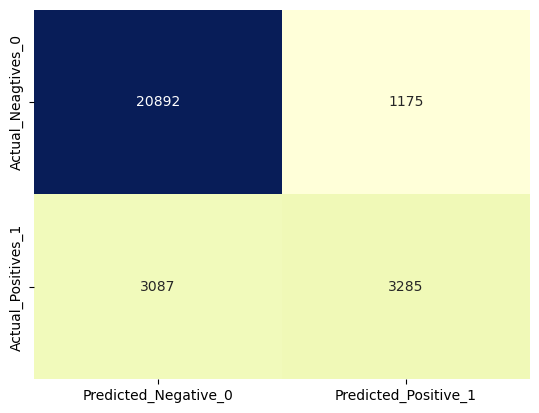

In [100]:
# Print the confusion matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred_test)
Confusion_Matrix = pd.DataFrame(data= cm,index=['Actual_Neagtives_0','Actual_Positives_1'],
                                columns = ['Predicted_Negative_0', 'Predicted_Positive_1'])
sns.heatmap(Confusion_Matrix, cmap='YlGnBu',annot= True, fmt = "d",cbar= False)



In [101]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [102]:
print(f"Classification Error : {1 - accuracy_score(y_test,y_pred_test)}")

Classification Error : 0.14986462252540522


### True Positive Rate

True Positive Rate is also called as Recall.

Percentage of correctly classified postives out of all the actual postives

- TP /(TP + FN)

### False Positive Rate

Percenatge of incorrectly classified negatives out of all the actual negatives

- FP/(TN + FP)

Percenatge of correctly classified negatives out of all the actual negatives. It is also called as Specificity.
- TN / (TN + FP)

### f1 - score

f1-score is the weighted Harmonic mean of Precision and Recall. The best f1-score would be 1.0 and the worst would be 0.0. 
The weighted f1-score should be used to compare the classsifier models, not the global accuracy.

### Support

Supoort is the actual number of occurrences of the class in our dataset.

### Adjusting the Threshold level

In [103]:
# Print the first 10 probabilities of two classes - 0 and 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.91387267, 0.08612733],
       [0.83562986, 0.16437014],
       [0.82035823, 0.17964177],
       [0.99025908, 0.00974092],
       [0.95726785, 0.04273215],
       [0.97994266, 0.02005734],
       [0.17838781, 0.82161219],
       [0.23482205, 0.76517795],
       [0.90050834, 0.09949166],
       [0.85480294, 0.14519706]])

In [104]:
# Store The Probabilities in the Dataframe
y_pred_prob_df = pd.DataFrame(data = y_pred_prob,columns= ['Prob of - No Rain Tomorrow (0)', 'Prob of - Rain Tomorrow(1)'] )
y_pred_prob_df

Prob of - No Rain Tomorrow (0)  Prob of - Rain Tomorrow(1)
0                        0.913873                    0.086127
1                        0.835630                    0.164370
2                        0.820358                    0.179642
3                        0.990259                    0.009741
4                        0.957268                    0.042732
5                        0.979943                    0.020057
6                        0.178388                    0.821612
7                        0.234822                    0.765178
8                        0.900508                    0.099492
9                        0.854803                    0.145197

#### Observations
- In each row, the numbers sum to 1.
- There are 2 columns which correspond to 2 classes - 0 and 1.-
- Class 0 - predicted probability that there is no rain tomorrow.

- Class 1 - predicted probability that there is rain tomorrow.

- Importance of predicted probabilities

- We can rank the observations by probability of rain or no rain.
  predict_proba process

- Predicts the probabilities

- Choose the class with the highest probability

- Classification threshold level

- There is a classification threshold level of 0.5.

- Class 1 - probability of rain is predicted if probability > 0.5.

- Class 0 - probability of no rain is predicted if probability < 0.5.

In [105]:
# Print the first 10 probability of class 1 - Prob of Rain
y_pred1 = logreg.predict_proba(X_test)[:, 1]
y_pred1

array([0.08612733, 0.16437014, 0.17964177, ..., 0.02325968, 0.20146974,
       0.69265976])

Text(0, 0.5, 'Frequnecy')

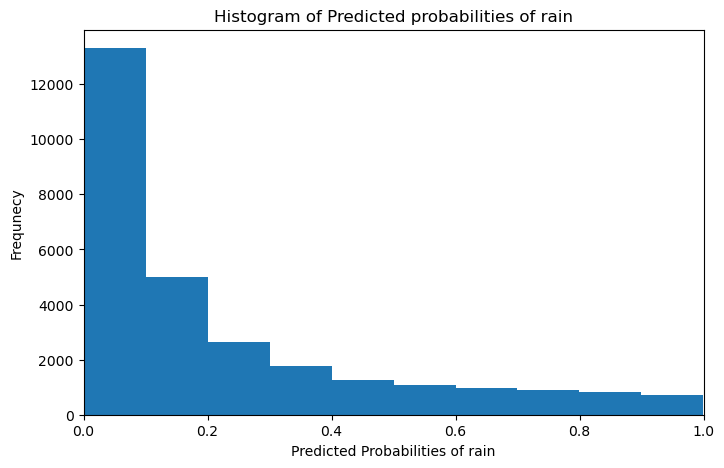

In [106]:
#PLot the Histogram of predicted probabilities
plt.figure(figsize =(8,5))

# Histplot
plt.hist(y_pred1,bins = 10)

# Set the title
plt.title("Histogram of Predicted probabilities of rain")

#Set the x-axis limit
plt.xlim(0, 1)

plt.xlabel("Predicted Probabilities of rain")
plt.ylabel("Frequnecy")



- We can see that above hisogram is highly postively skewed.
- The first column tells us that there are approximately 15000 observations with probability betwen 0 and 0.1.
- There are small number of observations with probability > 0.5
- So, these smal number of observations predict that there will be Rain Tomorrow.
- Majority of observations predict that there will be no Rain Tomorrow.

### Lower The Threshold


In [107]:
from sklearn.preprocessing import binarize
for i in range(1,6):
    cm1 = 0
    
    y_pred1  = logreg.predict_proba(X_test)[:, 1]
    
    y_pred1= y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(X= y_pred1.reshape(-1,1),threshold=i/10)
    
    y_pred2 = np.where(y_pred2 == 1,"Yes","No")
    
    cm1 = confusion_matrix(y_test,y_pred2)
    
    print(f"""With  {i/10} threshold the Confusion Matrix is \n\n {cm1}\n\nwith {cm1[0,0] + cm1[1,1]} correct prediction\n\n
    with {cm1[0,1]} Type I Error(False Positives) \n\n
    with {cm1[1,0]} Type II Error(False Negatives) \n\n
    Accuracy Score : {accuracy_score(y_test, y_pred2)}\n\n
    Sensitivity    : {cm1[1,1]/(cm1[1,1]+cm1[1,0])}\n\n
    Specificity    : {cm1[0,0]/(cm1[0,0]+cm1[0,1])}\n\n
    
    ===========================================================\n\n
          """)

With  0.1 threshold the Confusion Matrix is 

 [[12726  9341]
 [  547  5825]]

with 18551 correct prediction


    with 9341 Type I Error(False Positives) 


    with 547 Type II Error(False Negatives) 


    Accuracy Score : 0.6523084496641935


    Sensitivity    : 0.9141556811048337


    Specificity    : 0.5766982371867494


    


          
With  0.2 threshold the Confusion Matrix is 

 [[17066  5001]
 [ 1233  5139]]

with 22205 correct prediction


    with 5001 Type I Error(False Positives) 


    with 1233 Type II Error(False Negatives) 


    Accuracy Score : 0.7807939800977531


    Sensitivity    : 0.806497175141243


    Specificity    : 0.7733720034440568


    


          
With  0.3 threshold the Confusion Matrix is 

 [[19080  2987]
 [ 1873  4499]]

with 23579 correct prediction


    with 2987 Type I Error(False Positives) 


    with 1873 Type II Error(False Negatives) 


    Accuracy Score : 0.8291079151868912


    Sensitivity    : 0.7060577526679221


    Specific

### Comments
- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
- Threshold can be adjusted to increase sensitivity or specificity.
- Sensitivity and Specificity have an inverse relationship. Increasing one would always decrease the other and vice-versa.
- Adjusting the threshold level should be the one of the last step you do in the model building-process.

### ROC-AUC

Another tool to measure the classification model performance visually is ROC Curve. 
ROC Curve stands for Receiver Operating Characteristic Curve. An ROC curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold levels.
True Positive Rate (TPR) is also caled as Recall. It is defined as the ratio of TP to (TP +FN)

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN)

In the ROC Curve, we will focus on the TPR(True Positive Rate) and FPR(False Postive Rate)of a single point. This will give us the general performance 
of the ROC Curve which consists of TPR and FPR at various threshold levels. So, ROC curve plots TPR and FPR at different classifcation threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP). 

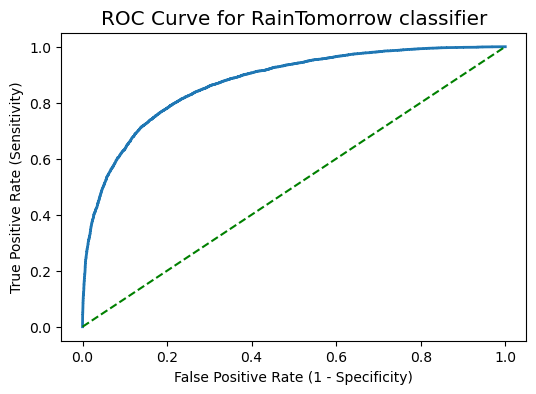

In [108]:
# Plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1,pos_label='Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, linewidth = 2)
plt.plot([0,1],[0,1], 'g--')
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC Curve help us to choose a threshold level that balances sensitivity and specificity.

### ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare clasifier performance. In this technique, we measure the area under the curve(AUC).
A perfect classifier wil have a ROC AUC equal to 1, whereas a purely random classifier will have ROC AUC equal to 0.5

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [109]:
# Compute ROC AUC
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print(f"ROC AUC: {ROC_AUC}" )

ROC AUC: 0.8729186716673593


#### Commments
- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [110]:
# Calculate cross-validated ROC-AUC
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv = 10, scoring ='roc_auc').mean()
print(f"Cross_validated ROC_AUC: {Cross_validated_ROC_AUC}")

Cross_validated ROC_AUC: 0.8696221592684227


### Model Evaluation and Improvement
In this section, I will employ several techniques to improve the model performance. I will discuss 3 techniques which are used in practice for 
performance improvement. These are "recursive feature elimination", "k-fold cross validation" and "hyperparameter optimization using GridSearchCV".

### Recursive Feature Elimination with Cross Validation

Recursive Feature Elimination (RFE) is a feature selection technique that help us to select best features from the given number of features.
At first,the model is built on a given number of features. Then, it removes the least useful predictor and build the model again. This entire process is repeated 
until all the unimportant features are removed from the model.

Recursive Feature Elimination with Cross-Validated (RFECV) feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively
using recursive feature elimination. Then it selects the best subset of features based on cross_validated accuracy score or roc_auc of the model.
Recursive Feature Elimination technique eliminates n features from a model by fitting a model multiple time and at each step, removing the weakest feature from the set of features.

I will use this technique to select best feature from the model.

In [111]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step = 1,cv = 5, scoring ='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 111


In [112]:
# Transform the training data
X_train_rfecv = rfecv.transform(X_train)

# Train Classifier
logreg.fit(X_train_rfecv, y_train)

# test classifier on test data
X_test_rfecv = rfecv.transform(X_test)
y_pred_rfecv = logreg.predict(X_test_rfecv)


In [122]:
# print mean accuracy on transformed test data
print(f"Classifier score : {logreg.score(X_test_rfecv, y_test)}")

Classifier score : 0.8499243995921094


Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.

In [125]:
# Confusion Matrix Revisited
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rfecv)
print(f"Confusion matrix : \n{cm}")

Confusion matrix : 
[[20892  1175]
 [ 3093  3279]]


### K-Fold Cross Validation

In [126]:
# Applying 5 - Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train,y_train, cv = 5, scoring= 'accuracy')
print(f"Cross Validated Scores : {scores}")

Cross Validated Scores : [0.84690783 0.84624852 0.84633642 0.84963298 0.84773626]


In [127]:
# Summarize the cross validated scores 
print(f"Mean Cross Validated Score :  {scores.mean()}")

Mean Cross Validated Score :  0.8473724032900861


Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

In [128]:
### Hyperparameter Optimization Using GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'penalty' : ['l1', 'l2'],
    'C' : [1,10,100,1000]
} 


gird_search = GridSearchCV(estimator = logreg, param_grid= params, scoring='accuracy', cv = 5, verbose=0 )

gird_search.fit(X_train,y_train)




GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [131]:
# Examine the best model

# Best Score Achieved During the GridSearch CV
print(f"GridSearchCV Best Score: {gird_search.best_score_}")

# print parameters that give the best result
print(f"\n\nGridSearchCV Best Parameters : {gird_search.best_params_}")

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (gird_search.best_estimator_))

GridSearchCV Best Score: 0.8473811929532381


GridSearchCV Best Parameters : {'C': 1, 'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')


In [132]:
print(f"GridSearchCV score on test set :{gird_search.score(X_test, y_test)}")

GridSearchCV score on test set :0.8506979851612223


In [134]:
best_model = gird_search.best_estimator_
best_model_preds = best_model.predict(X_test)

#Classification Report
print(classification_report(y_test,best_model_preds))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Commments

- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.
- We can see that GridSearch CV improve the performance for this particular model.

### Results and Conclusion

- The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not    it will rain tomorrow in Australia.

- Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

- The model shows no signs of overfitting.

- Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

- Increasing the threshold level results in increased accuracy.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

- Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

- In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

- Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.